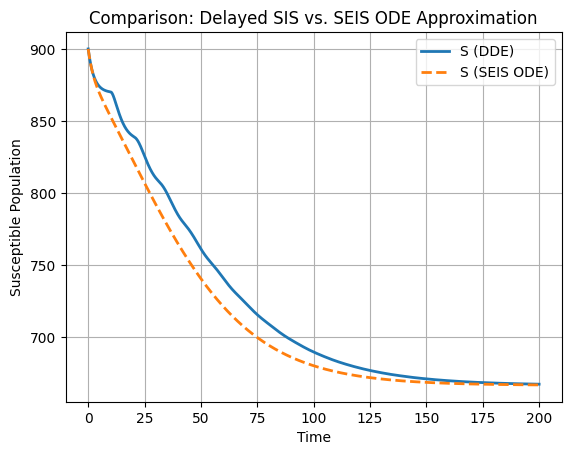

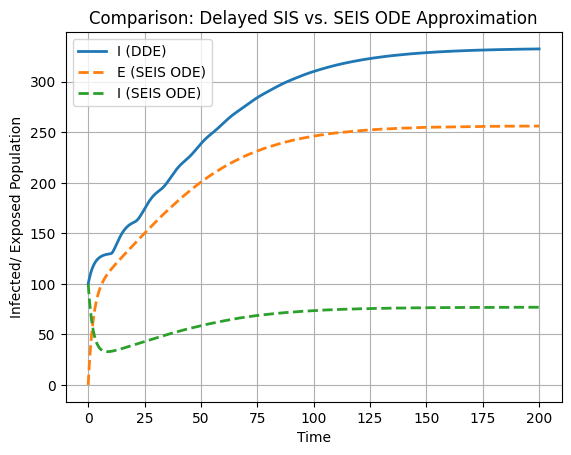

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint
from scipy.integrate import solve_ivp

# --------------------------------------------------------
# PARAMETERS
# --------------------------------------------------------
beta = 0.5
gamma = 1/3
tau   = 10
N     = 1000

# Initial conditions for ODE version
S0 = 900
I0 = 100
E0 = 0        # No exposed yet initially

# --------------------------------------------------------
# HISTORY FUNCTION for DDE
# S(t) = 1000 for t in [-tau,0]
# --------------------------------------------------------
def history(t):
    return np.array([900, 100])  # [S(t), I(t)]

# --------------------------------------------------------
# DELAYED SIS MODEL (DDE)
# S' = -β S(t) I(t-τ)/N + γ I(t)
# I' =  β S(t) I(t-τ)/N - γ I(t)
# --------------------------------------------------------
def SIS_dde(Y, t):
    S, I = Y(t)
    S_tau, I_tau = Y(t - tau)
    dS = -(beta/N) * S * I_tau + gamma * I
    dI =  (beta/N) * S * I_tau - gamma * I
    return np.array([dS, dI])

# Time grid
t_eval = np.linspace(0, 200, 10**4)

# Solve DDE
sol_dde = ddeint(SIS_dde, history, t_eval)

S_dde = sol_dde[:,0]
I_dde = sol_dde[:,1]

# --------------------------------------------------------
# SEIS ODE MODEL
# S' = -(β/N) S I + γI
# E' =  (β/N) S I - (1/τ)E
# I' =  (1/τ)E - γI
# --------------------------------------------------------
def SEIS_ode(t, y):
    S, E, I = y
    dS = -(beta/N)*S*I + gamma*I
    dE =  (beta/N)*S*I - (1/tau)*E
    dI =  (1/tau)*E - gamma*I
    return [dS, dE, dI]

# Solve ODE
sol_ode = solve_ivp(
    SEIS_ode, [0, 200], [S0, E0, I0],
    t_eval=t_eval
)

S_ode = sol_ode.y[0]
E_ode = sol_ode.y[1]
I_ode = sol_ode.y[2]

# --------------------------------------------------------
# PLOT RESULTS
# --------------------------------------------------------

plt.plot(t_eval, S_dde, label="S (DDE)", lw=2)
plt.plot(t_eval, S_ode, '--', label="S (SEIS ODE)", lw=2)
plt.xlabel("Time")
plt.ylabel("Susceptible Population")
plt.title("Comparison: Delayed SIS vs. SEIS ODE Approximation")
plt.legend()
plt.grid(True)

plt.show()
plt.plot(t_eval, I_dde, label="I (DDE)", lw=2)
plt.plot(t_eval, E_ode, '--', label="E (SEIS ODE)", lw=2)
plt.plot(t_eval, I_ode, '--', label="I (SEIS ODE)", lw=2)
plt.xlabel("Time")
plt.ylabel("Infected/ Exposed Population")
plt.title("Comparison: Delayed SIS vs. SEIS ODE Approximation")
plt.legend()
plt.grid(True)
plt.show()
